<a href="https://colab.research.google.com/github/lseidy/Machine-Learning-Basics/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arvores de Decisão
funcionam igual as arvores estudadas em Algoritmo e Estrutura de Dados cada nó decide algo até chegar na folha

Entropia
Ganho de Informação

Esses dois fatores é utilizado para achar o atributo que vai corresponder à raiz da árvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Credit Base - 81.62%

In [ ]:
import pickle
with open('/content/drive/MyDrive/risk_credit.pkl', 'rb') as f:
  X_credit_risk, y_credit_risk = pickle.load(f)

In [ ]:
X_credit_risk, y_credit_risk

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_credit_risk, y_credit_risk)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
decision_tree.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

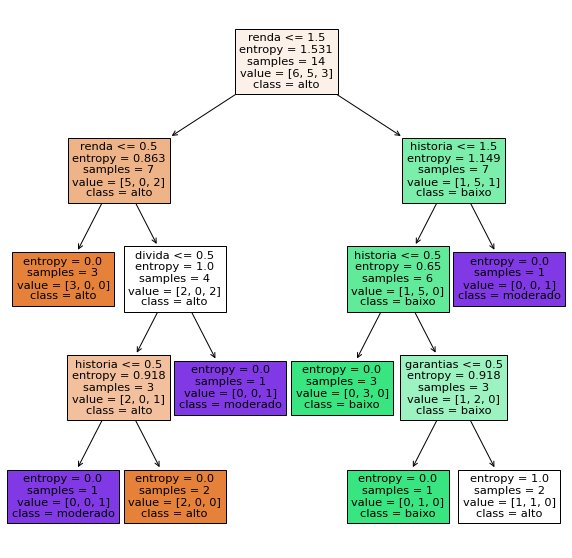

In [ ]:
from sklearn import tree
previsores = ['historia', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(decision_tree, feature_names=previsores, class_names = decision_tree.classes_, filled=True);

In [ ]:
#historia boa, divida alta, garantias nenhuma, renda >35
#historia ruim, divida alta, garantias adequada, renda < 15
predictors = decision_tree.predict([[0,0,1,2], [2,0,0,0]])
predictors

array(['baixo', 'alto'], dtype=object)

In [ ]:
with open('/content/drive/MyDrive/credit.pkl', 'rb') as f:
  X_credit_risk_train, y_credit_risk_train, X_credit_risk_test, y_credit_risk_test = pickle.load(f)

In [ ]:
X_credit_risk_train.shape, y_credit_risk_train.shape

((24435, 3), (24435,))

In [ ]:
X_credit_risk_test.shape, y_credit_risk_test.shape

((8146, 3), (8146,))

In [ ]:
credit_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
credit_tree.fit(X_credit_risk_train, y_credit_risk_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
X_credit_risk_test

array([[-0.59925747, -0.39970929, -1.13720071],
       [-0.59925747,  0.3053322 ,  2.43762325],
       [-0.59925747,  0.35373321, -0.56775973],
       ...,
       [ 0.36779533, -0.227079  , -0.09322557],
       [-0.59925747,  0.03105976, -0.56775973],
       [-0.43808201, -0.03347493,  1.64673299]])

In [ ]:
predictors = credit_tree.predict(X_credit_risk_test)
predictors

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_credit_risk_test

2124     0
252      0
13083    0
12447    0
31009    0
        ..
1438     1
28083    0
22127    0
10487    0
709      1
Name: loan_status, Length: 8146, dtype: int64

In [ ]:
#calculos de acerto e acuracia
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_risk_test, predictors)

0.816228823962681

0.816228823962681

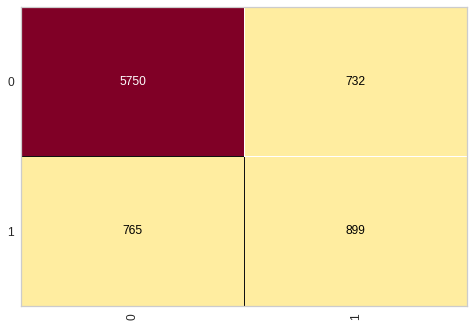

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(credit_tree)
cm.fit(X_credit_risk_train,y_credit_risk_train)
cm.score(X_credit_risk_test, y_credit_risk_test)

In [ ]:
print(classification_report(y_credit_risk_test,predictors))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6482
           1       0.55      0.54      0.55      1664

    accuracy                           0.82      8146
   macro avg       0.72      0.71      0.72      8146
weighted avg       0.81      0.82      0.82      8146



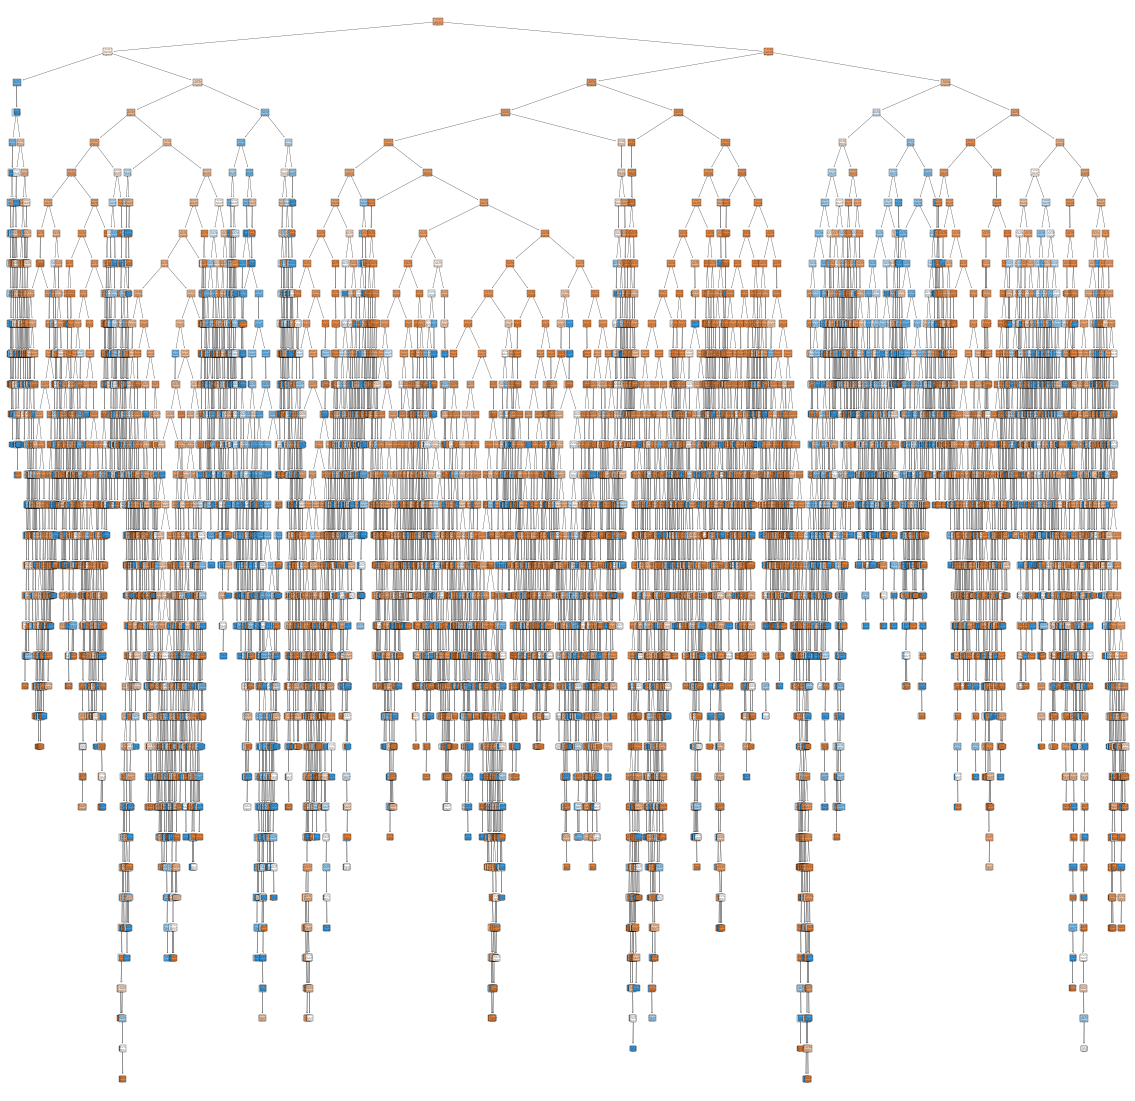

In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(credit_tree, feature_names=predictors, class_names = str(credit_tree.classes_), filled=True);
fig.savefig('Credit_Tree.png')

In [ ]:
with open('/content/drive/MyDrive/census.pkl', 'rb') as f:
  X_census_train, y_census_train, X_census_test, y_census_test = pickle.load(f)

In [ ]:
 X_census_train.shape, y_census_train.shape

((27676, 117), (27676,))

In [ ]:
X_census_test.shape, y_census_test.shape

((4885, 117), (4885,))

In [ ]:
census_tree=DecisionTreeClassifier(criterion='entropy', random_state=0)
census_tree.fit(X_census_train, y_census_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predictors = census_tree.predict(X_census_test)
predictors

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [ ]:
y_census_test

22278    <=50K
8950     <=50K
7838     <=50K
16505    <=50K
19140     >50K
         ...  
28592    <=50K
17008    <=50K
25123    <=50K
21036    <=50K
13998    <=50K
Name: income, Length: 4885, dtype: object

In [ ]:
#calculos de acerto e acuracia
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_census_test, predictors)

0.8114636642784033

0.8114636642784033

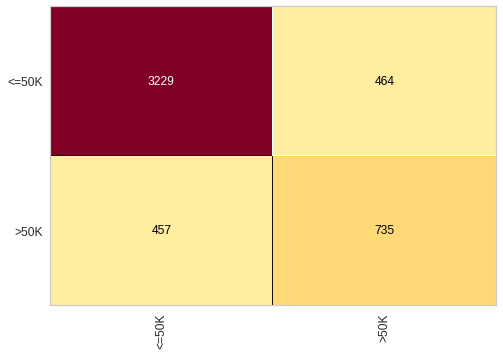

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(census_tree)
cm.fit(X_census_train,y_census_train)
cm.score(X_census_test, y_census_test)

In [ ]:
print(classification_report(y_census_test,predictors))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      3693
        >50K       0.61      0.62      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.75      0.74      4885
weighted avg       0.81      0.81      0.81      4885

